In [9]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [11]:
#data = pd.read_csv('chucks/chucks/chuck_0.csv', sep=';')
#data
chunks_folder = 'chucks/chucks'

final_data = pd.DataFrame()

chunk_data = []

for file in os.listdir(chunks_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(chunks_folder, file)
        data = pd.read_csv(file_path)
        chunk_data.append(data)

final_data = pd.concat(chunk_data, ignore_index=True)
final_data.to_csv('data.csv', index=False)

In [12]:
data = pd.read_csv('data.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17100347,2023-01-28 08:39:57,145.0,51.038288,3.756774,29.0,16.0,341.0,327.0,1417.0,1353.0,81.0,82.0,83.0,85.0,0.6,0.0,5.6,0.0
17100348,2023-01-28 08:43:03,191.0,50.930731,5.327744,27.0,26.0,289.0,276.0,795.0,801.0,77.0,79.0,70.0,72.0,0.6,0.0,5.6,0.0
17100349,2023-01-28 08:42:49,104.0,50.056842,4.492362,6.0,17.0,217.0,303.0,804.0,797.0,76.0,53.0,77.0,54.0,0.6,0.0,5.6,0.0
17100350,2023-01-28 08:45:21,186.0,51.246188,5.542875,36.0,38.0,162.0,200.0,801.0,800.0,77.0,83.0,77.0,80.0,0.6,0.0,5.6,0.0


In [19]:
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values

In [30]:
# Parameters of Fuzzy C-means
n_clusters = 3
m = 2
error_threshold = 0.005

# Execution of Fuzzy C-means
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, n_clusters, m, error=error_threshold, maxiter=1000, init=None
)


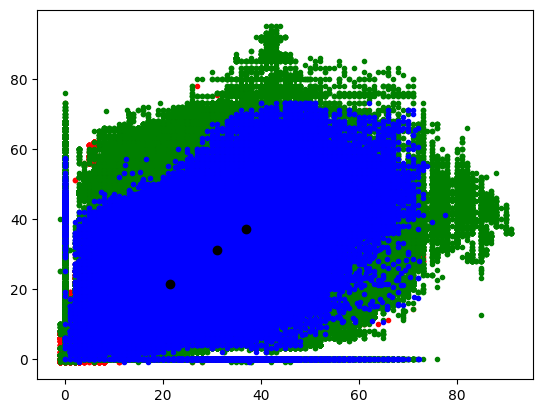

In [31]:
cluster_membership = np.argmax(u, axis=0)

colors = ["r.", "g.", "b."]
for i in range(n_clusters):
    plt.plot(X[cluster_membership == i, 0], X[cluster_membership == i, 1], colors[i])

# centers of cluster
for j in range(n_clusters):
    plt.plot(centers[j, 0], centers[j, 1], "ko")

plt.show()